# Color

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

file_path = "/home/commonsense/data/cvpr/cliport/data/packing-boxes-test/color/000000-10001.pkl"

with open(file_path, 'rb') as f:
    data = pickle.load(f) 

In [29]:
data.shape

(4, 3, 480, 640, 3)

In [30]:
data = data.astype(np.uint8)

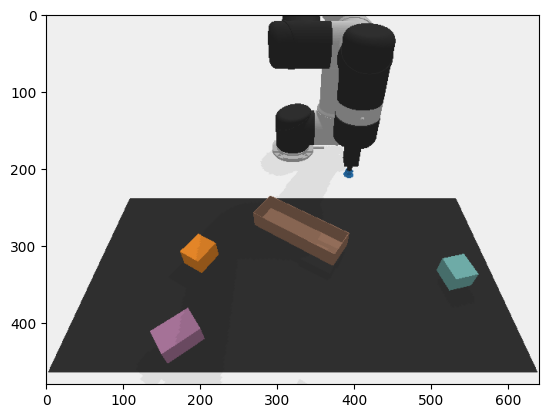

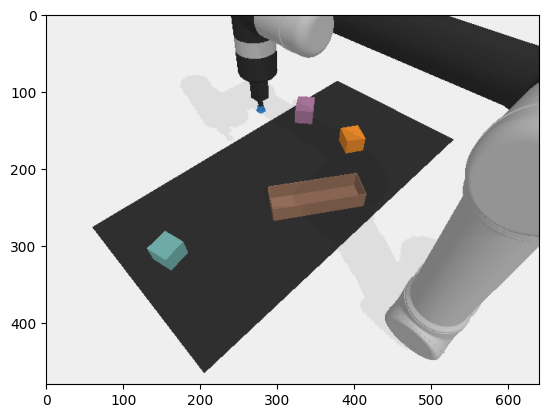

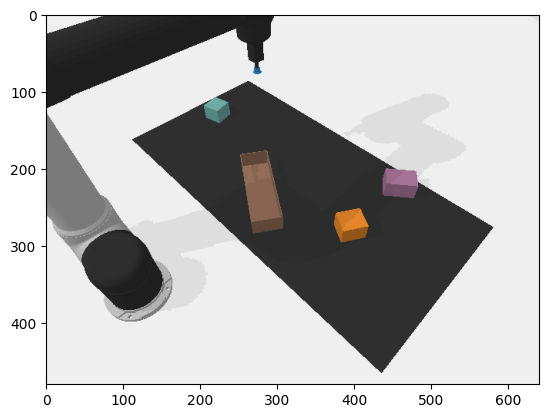

In [31]:
for i in range(3):
    plt.imshow(data[0][i])
    plt.show()

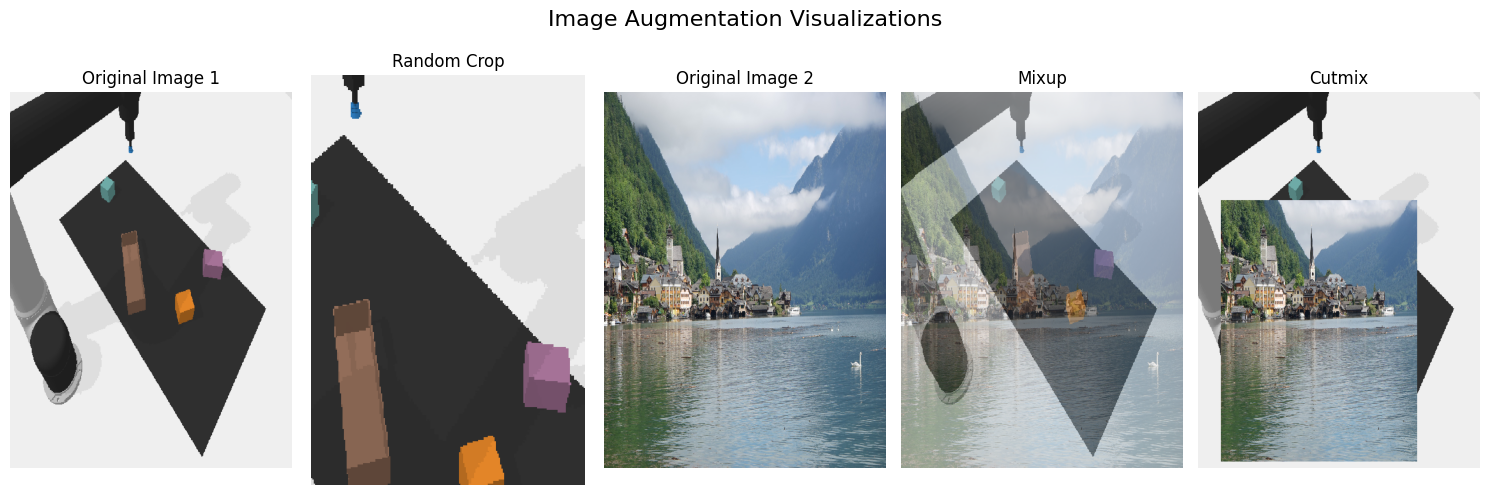

In [35]:
import numpy as np
from PIL import Image

def random_crop(image, crop_size):
    """이미지를 주어진 크기로 랜덤 크롭합니다."""
    width, height = image.size
    x = np.random.randint(0, width - crop_size[0])
    y = np.random.randint(0, height - crop_size[1])
    return image.crop((x, y, x + crop_size[0], y + crop_size[1]))

def mixup(image1, image2, alpha=0.5):
    """두 이미지를 mixup 비율로 합성합니다."""
    image1, image2 = np.array(image1), np.array(image2)
    mixed = (alpha * image1 + (1 - alpha) * image2).astype(np.uint8)
    return Image.fromarray(mixed)

def cutmix(image1, image2, beta=1.0):
    """두 이미지를 cutmix 방식으로 합성합니다."""
    lam = np.random.beta(beta, beta)
    width, height = image1.size
    cut_w, cut_h = int(width * lam), int(height * lam)
    
    x, y = np.random.randint(0, width - cut_w), np.random.randint(0, height - cut_h)
    image1, image2 = np.array(image1), np.array(image2)
    
    # 이미지1에 이미지2의 일부를 대체
    image1[y:y+cut_h, x:x+cut_w] = image2[y:y+cut_h, x:x+cut_w]
    return Image.fromarray(image1)

# 예시
image1 = Image.fromarray(data[0][i]).resize((480, 640))
image2 = Image.open('/home/commonsense/data/cvpr/cliport/notebooks/085.jpg').resize((480, 640))
# 각 증강 방식 적용
cropped = random_crop(image1, (200, 300))
mixed = mixup(image1, image2, alpha=0.5)
cutmixed = cutmix(image1, image2)

# 시각화
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle("Image Augmentation Visualizations", fontsize=16)

# 원본 이미지1, 이미지2
axs[0].imshow(np.array(image1))
axs[0].set_title("Original Image 1")
axs[0].axis("off")

axs[2].imshow(np.array(image2))
axs[2].set_title("Original Image 2")
axs[2].axis("off")

# 증강 이미지
axs[1].imshow(np.array(cropped))
axs[1].set_title("Random Crop")
axs[1].axis("off")

axs[3].imshow(np.array(mixed))
axs[3].set_title("Mixup")
axs[3].axis("off")

axs[4].imshow(np.array(cutmixed))
axs[4].set_title("Cutmix")
axs[4].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 제목을 위해 여백 추가
plt.show()


# Action

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

file_path = "/home/commonsense/data/cvpr/cliport/data/packing-boxes-test/action/000000-0.pkl"

with open(file_path, 'rb') as f:
    data = pickle.load(f) 

In [ ]:
data

[{'pose0': (array([0.346875 , 0.190625 , 0.0401001]), array([0, 0, 0, 1])),
  'pose1': (array([0.36110801, 0.09216854, 0.02003101]),
   array([ 0.        ,  0.        , -0.04375602,  0.99904227]))},
 None]

# Info

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

file_path = "/home/commonsense/data/cvpr/cliport/data/align-box-corner-train/info/000000-0.pkl"

with open(file_path, 'rb') as f:
    data = pickle.load(f)

In [ ]:
data

[{5: ((0.340625, 0.03749999999999998, 0.0),
   (0.0, 0.0, 0.9713746831992323, 0.23755257279093217),
   (0.055, 0.005, 0.001)),
  6: ((0.33125, 0.13437500000000002, 0.020069084401791094),
   (0.0, 0.0, 0.9808386948783672, 0.19482159692729517),
   (0.10488135039273247, 0.12151893663724195, 0.04013816880358219)),
  'lang_goal': 'align the brown box with the green corner'},
 {5: ((0.340625, 0.03749999999999998, 0.0),
   (0.0, 0.0, 0.9713746831992323, 0.23755257279093217),
   (0.055, 0.005, 0.001)),
  6: ((0.3406409953762391, 0.03791249588842102, 0.019058626228686208),
   (4.587150889627687e-06,
    -1.102633118788347e-06,
    0.9713660919308881,
    0.2375877004911151),
   (0.10488135039273247, 0.12151893663724195, 0.04013816880358219)),
  'lang_goal': 'done with alignment'}]